In [80]:
#import pipeline as pipe
import pandas as pd
import numpy as np
import glob


#def load_data():
#    data = pipe.pipeline()


def load_preprocess_data():
    path = r'./Data-out' 
    all_files = glob.glob(path + "/hda_dataset_uniform_random_[0-7].csv")
    all_files.sort()
    
    #Load all data
    df = (pd.read_csv(f) for f in all_files)
    
    #Merge all the files with each other
    #Drop all duplicates
    concat_df = pd.concat(df).drop_duplicates().reset_index(drop=True)
    concat_df = concat_df.sort_values(by=['case', 'ts'])
    #reset index
    concat_df = concat_df.reset_index(drop=True)
    #Create a csv file
    #concat_df.to_csv('test1.csv')
    return concat_df

In [81]:
df = load_preprocess_data()
df.head()

,case,event,ts
0,1,Order imported,2018-09-02 00:02:30
1,1,Order checked,2018-09-02 00:02:41
2,1,Address correction,2018-09-02 00:06:21
3,1,Order creation failed (SYS-2),2018-09-02 00:07:00
4,1,Device hand-out,2018-09-03 16:36:00


# Puyas Experimente

In [1]:
import pandas as pd
import numpy as np

brands = pd.read_csv('./Data-out/brands.csv', sep =",")
brands.head()

,pid,BRAND
0,66605,BRAND_0
1,66715,BRAND_0
2,66756,BRAND_0
3,66774,BRAND_0
4,66794,BRAND_0


In [2]:
print("Anzahl verschiedener Brands: {}".format(brands.BRAND.unique().size))

Anzahl verschiedener Brands: 10


In [71]:
channel = pd.read_csv('./Data-out/channels.csv', sep =",")
channel.head()

,pid,CHANNEL
0,61,Onlineshop
1,142,Onlineshop
2,194,Onlineshop
3,247,Onlineshop
4,250,Onlineshop


In [72]:
group1 = channel.groupby(['CHANNEL']).count()
group1

,pid
CHANNEL,
Onlineshop,157440
Telemarketing,48295
Telesales,16167


In [3]:
group = brands.groupby(['BRAND']).count()
group

,pid
BRAND,
BRAND_0,4715
BRAND_1,205293
BRAND_2,10544
BRAND_3,193
BRAND_4,1657
BRAND_5,9
BRAND_6,26359
BRAND_7,14037
BRAND_8,62


In [27]:
group['brand'] = group.index
group

,pid,brand
BRAND,,
BRAND_0,4715,BRAND_0
BRAND_1,205293,BRAND_1
BRAND_2,10544,BRAND_2
BRAND_3,193,BRAND_3
BRAND_4,1657,BRAND_4
BRAND_5,9,BRAND_5
BRAND_6,26359,BRAND_6
BRAND_7,14037,BRAND_7
BRAND_8,62,BRAND_8


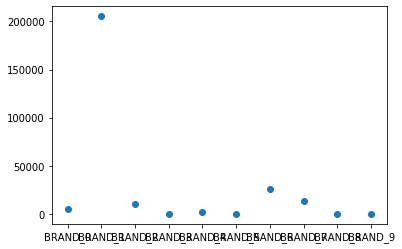

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(group['brand'], group['pid'])

In [105]:
import numpy as np
myArr = group['pid'].to_numpy()

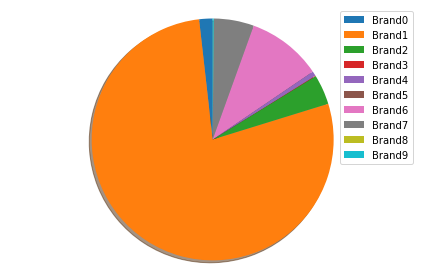

In [111]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
labels = ['Brand0', 'Brand1', 'Brand2', 'Brand3', 'Brand4', 'Brand5', 'Brand6', 'Brand7', 'Brand8', 'Brand9']
patches, texts = plt.pie(myArr, startangle=90, shadow=True)
#, autopct='%1.1f%%', pctdistance=0.7 , shadow=True
plt.legend(patches, labels, loc="best")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [87]:
channel = pd.read_csv('./Data-out/channels.csv', sep =",")
channel.head()


,pid,CHANNEL
0,61,Onlineshop
1,142,Onlineshop
2,194,Onlineshop
3,247,Onlineshop
4,250,Onlineshop


In [122]:
df1 = df.join(brands.set_index('pid'), on='case')
df1[df1['BRAND'] == 'BRAND_7' ]

,case,event,ts,BRAND
709923,131476,Export from online shop,2018-10-19 16:18:34,BRAND_7
709924,131476,Order imported,2018-10-23 15:38:41,BRAND_7
709925,131476,Address correction,2018-10-23 15:40:36,BRAND_7
709926,131476,Order checked,2018-10-23 15:42:27,BRAND_7
709927,131476,Ready for payment processing,2018-10-23 15:42:27,BRAND_7
...,...,...,...,...
1405555,263239,Delivery approved,2018-12-01 23:48:20,BRAND_7
1405556,263239,In delivery,2018-12-01 23:48:24,BRAND_7
1405557,263239,Ready to deliver,2018-12-03 05:04:35,BRAND_7
1405558,263239,Delivered,2018-12-03 09:35:03,BRAND_7
